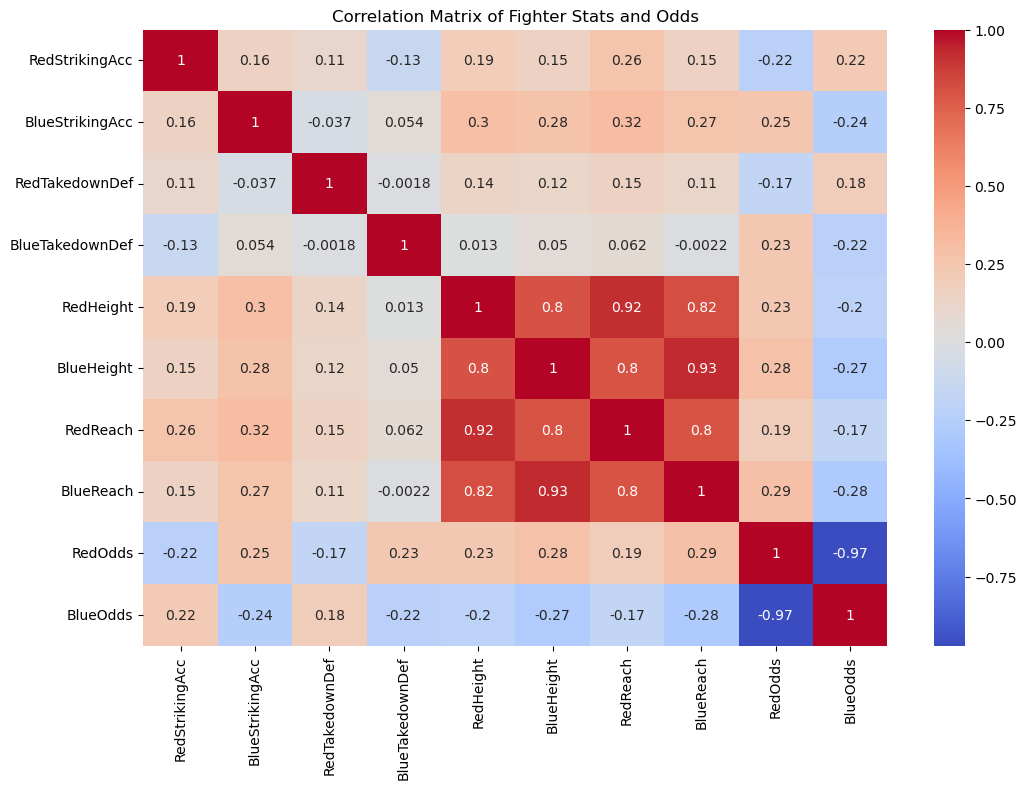

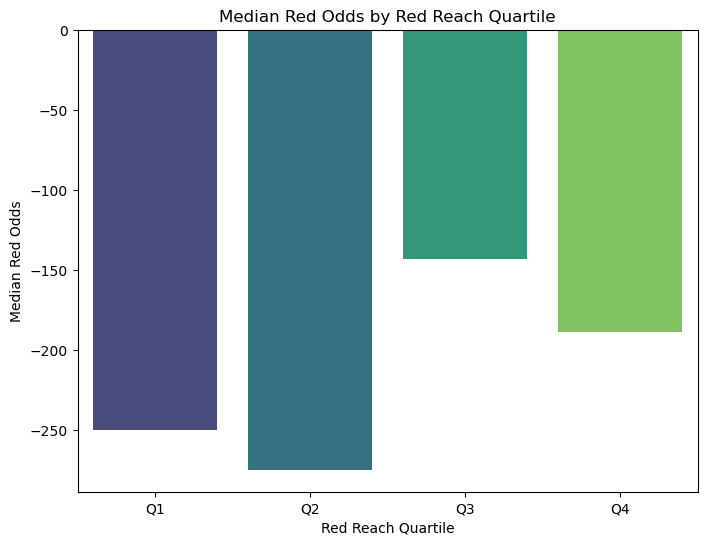

Logistic Regression Accuracy: 0.6744186046511628
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.57      0.27      0.36        15
           1       0.69      0.89      0.78        28

    accuracy                           0.67        43
   macro avg       0.63      0.58      0.57        43
weighted avg       0.65      0.67      0.64        43



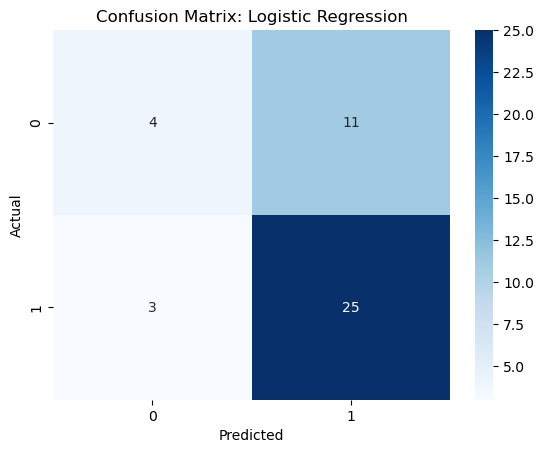

Decision Tree Accuracy: 0.5581395348837209
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.33      0.27      0.30        15
           1       0.65      0.71      0.68        28

    accuracy                           0.56        43
   macro avg       0.49      0.49      0.49        43
weighted avg       0.54      0.56      0.54        43



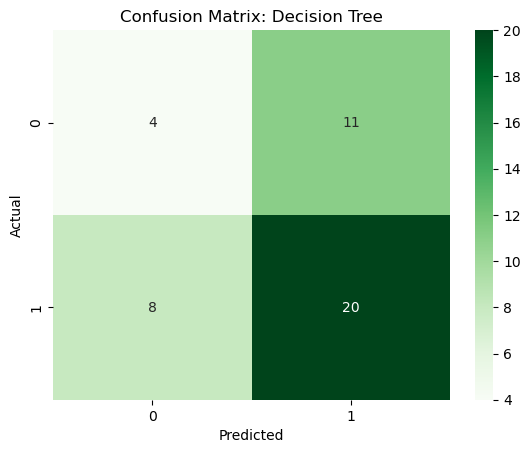

Logistic Regression Accuracy (Odds only): 0.6511627906976745
Classification Report (Odds only):
               precision    recall  f1-score   support

           0       0.50      0.20      0.29        15
           1       0.68      0.89      0.77        28

    accuracy                           0.65        43
   macro avg       0.59      0.55      0.53        43
weighted avg       0.61      0.65      0.60        43



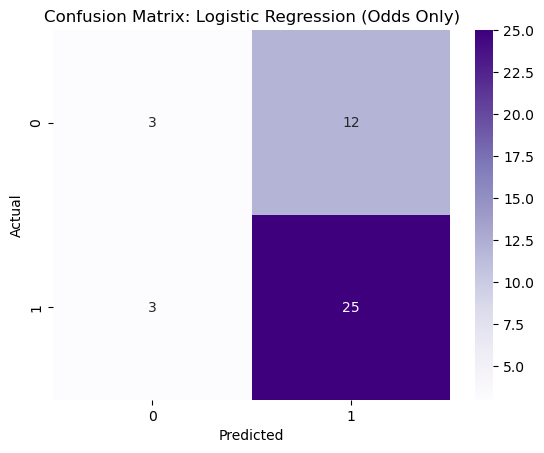

Logistic Regression Coefficients (Odds only):
    Feature  Coefficient
0   RedOdds    -0.002901
1  BlueOdds    -0.001128


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Load and clean the data
ufc_df = pd.read_csv('fights_stats.csv')
ufc_df.replace('--', np.nan, inplace=True)
ufc_df.dropna(inplace=True)
ufc_clean = ufc_df.copy()

# Create binary target variable for red fighter win
ufc_clean['Winner_Red'] = ufc_clean['Winner'].apply(lambda x: 1 if x == 'Red' else 0)

# Convert percentage fields to floats
ufc_clean['RedStrikingAcc'] = ufc_clean['RedStrikingAcc'].astype(str).str.replace('%', '').astype(float) / 100
ufc_clean['BlueStrikingAcc'] = ufc_clean['BlueStrikingAcc'].astype(str).str.replace('%', '').astype(float) / 100
ufc_clean['RedTakedownDef'] = ufc_clean['RedTakedownDef'].astype(str).str.replace('%', '').astype(float)
ufc_clean['BlueTakedownDef'] = ufc_clean['BlueTakedownDef'].astype(str).str.replace('%', '').astype(float)

# Convert height and reach fields
for col in ['RedHeight', 'RedReach', 'BlueHeight', 'BlueReach']:
    ufc_clean[col] = ufc_clean[col].astype(str).str.replace('"', '').astype(float)

# Reset index
ufc_clean.reset_index(drop=True, inplace=True)

# Descriptive statistics
desc_stats = ufc_clean[['RedStrikingAcc', 'BlueStrikingAcc', 'RedTakedownDef', 'BlueTakedownDef', 
                        'RedHeight', 'BlueHeight', 'RedReach', 'BlueReach', 'RedOdds', 'BlueOdds']].describe()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(ufc_clean[['RedStrikingAcc', 'BlueStrikingAcc', 'RedTakedownDef', 'BlueTakedownDef', 
                       'RedHeight', 'BlueHeight', 'RedReach', 'BlueReach', 'RedOdds', 'BlueOdds']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Fighter Stats and Odds')
plt.show()

# Bar plot example for median odds by reach quartile
ufc_clean['RedReach_Q'] = pd.qcut(ufc_clean['RedReach'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
reach_medians = ufc_clean.groupby('RedReach_Q')['RedOdds'].median().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='RedReach_Q', y='RedOdds', data=reach_medians, palette='viridis')
plt.title('Median Red Odds by Red Reach Quartile')
plt.xlabel('Red Reach Quartile')
plt.ylabel('Median Red Odds')
plt.show()

# Machine learning: Logistic Regression
features = ['RedStrikingAcc', 'RedTakedownDef', 'RedHeight', 'RedReach', 
            'BlueStrikingAcc', 'BlueTakedownDef', 'BlueHeight', 'BlueReach']
X = ufc_clean[features]
y = ufc_clean['Winner_Red']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Machine learning: Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))

# Confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Modeling using only RedOdds and BlueOdds
odds_features = ['RedOdds', 'BlueOdds']
X_odds = ufc_clean[odds_features]
y_odds = ufc_clean['Winner_Red']

X_train_odds, X_test_odds, y_train_odds, y_test_odds = train_test_split(X_odds, y_odds, test_size=0.2, random_state=42)

log_reg_odds = LogisticRegression()
log_reg_odds.fit(X_train_odds, y_train_odds)
y_pred_odds = log_reg_odds.predict(X_test_odds)

print("Logistic Regression Accuracy (Odds only):", accuracy_score(y_test_odds, y_pred_odds))
print("Classification Report (Odds only):\n", classification_report(y_test_odds, y_pred_odds))

# Odds-only confusion matrix
conf_matrix_odds = confusion_matrix(y_test_odds, y_pred_odds)
sns.heatmap(conf_matrix_odds, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix: Logistic Regression (Odds Only)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Coefficient interpretation
coeffs_odds = pd.DataFrame({
    'Feature': odds_features,
    'Coefficient': log_reg_odds.coef_[0]
})
print("Logistic Regression Coefficients (Odds only):")
print(coeffs_odds)
